In [1]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, random_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 6
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

100%|██████████| 170M/170M [00:02<00:00, 79.3MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
import torch
import torch.nn as nn

class CIFAR10_Model(nn.Module):
    def __init__(self):
        super(CIFAR10_Model, self).__init__()


        self.w1 = nn.Parameter(torch.randn(3 * 32 * 32, 512) * 0.01)
        self.b1 = nn.Parameter(torch.zeros(512))

        self.w2 = nn.Parameter(torch.randn(512, 256) * 0.01)
        self.b2 = nn.Parameter(torch.zeros(256))

        self.w3 = nn.Parameter(torch.randn(256, 10) * 0.01)
        self.b3 = nn.Parameter(torch.zeros(10))

    def forward(self, x):

        x = x.view(x.size(0), -1)


        z1 = torch.relu(torch.mm(x, self.w1) + self.b1)


        z2 = torch.relu(torch.mm(z1, self.w2) + self.b2)


        output = torch.mm(z2, self.w3) + self.b3
        return output


model = CIFAR10_Model()


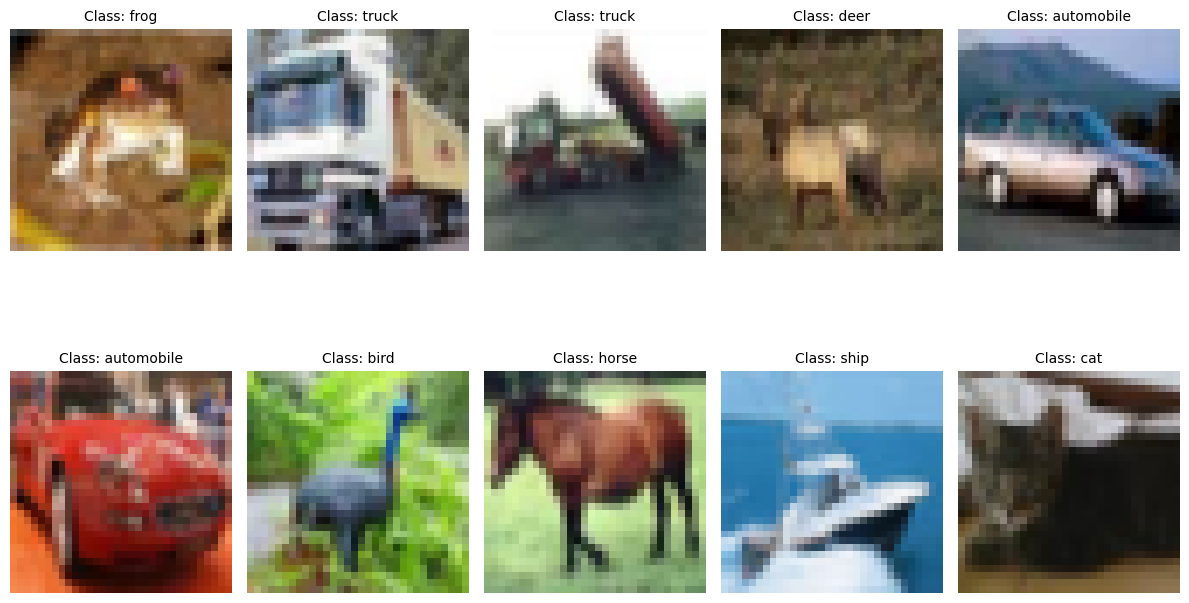

In [4]:
import matplotlib.pyplot as plt

def show_images(dataset, class_names, num_images=6):

    fig, axes = plt.subplots(2, 5, figsize=(12, 8))
    axes = axes.ravel()

    for i in range(num_images):

        img, label = dataset[i]
        img = img / 2 + 0.5
        np_img = img.numpy()


        axes[i].imshow(np.transpose(np_img, (1, 2, 0)), interpolation='none')
        axes[i].axis('off')
        axes[i].set_title(f"Class: {class_names[label]}", fontsize=10)


    plt.tight_layout()
    plt.show()


show_images(train_dataset,train_dataset.classes, num_images=10)


In [5]:
model = CIFAR10_Model()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD([model.w1, model.b1, model.w2, model.b2, model.w3, model.b3], lr=0.01)


num_epochs = 55
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)


        loss.backward()
        optimizer.step()


        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 2000 == 1999:
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}, accuracy: {100 * correct / total:.2f}%")
            running_loss = 0.0
    print("Training completed")

[1,  2000] loss: 21.031, accuracy: 23.04%
[1,  4000] loss: 18.064, accuracy: 28.66%
[1,  6000] loss: 16.836, accuracy: 32.35%
[1,  8000] loss: 16.086, accuracy: 34.87%
Training completed
[2,  2000] loss: 15.289, accuracy: 45.98%
[2,  4000] loss: 14.962, accuracy: 46.38%
[2,  6000] loss: 14.520, accuracy: 47.04%
[2,  8000] loss: 14.470, accuracy: 47.26%
Training completed
[3,  2000] loss: 13.665, accuracy: 51.45%
[3,  4000] loss: 13.562, accuracy: 51.77%
[3,  6000] loss: 13.447, accuracy: 52.04%
[3,  8000] loss: 13.359, accuracy: 52.28%
Training completed
[4,  2000] loss: 12.596, accuracy: 54.74%
[4,  4000] loss: 12.624, accuracy: 54.99%
[4,  6000] loss: 12.618, accuracy: 55.22%
[4,  8000] loss: 12.557, accuracy: 55.23%
Training completed
[5,  2000] loss: 11.762, accuracy: 58.03%
[5,  4000] loss: 11.736, accuracy: 58.28%
[5,  6000] loss: 11.733, accuracy: 58.55%
[5,  8000] loss: 12.006, accuracy: 58.33%
Training completed
[6,  2000] loss: 10.937, accuracy: 62.24%
[6,  4000] loss: 11.028

Files already downloaded and verified
Epoch [1/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [2/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [3/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [4/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [5/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [6/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [7/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [8/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [9/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [10/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [11/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [12/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [13/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [14/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [15/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [16/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [17/55], Test Loss: 4.591, Test Accuracy: 55.09%
Epoch [18/55], Test Loss: 4.591, Tes

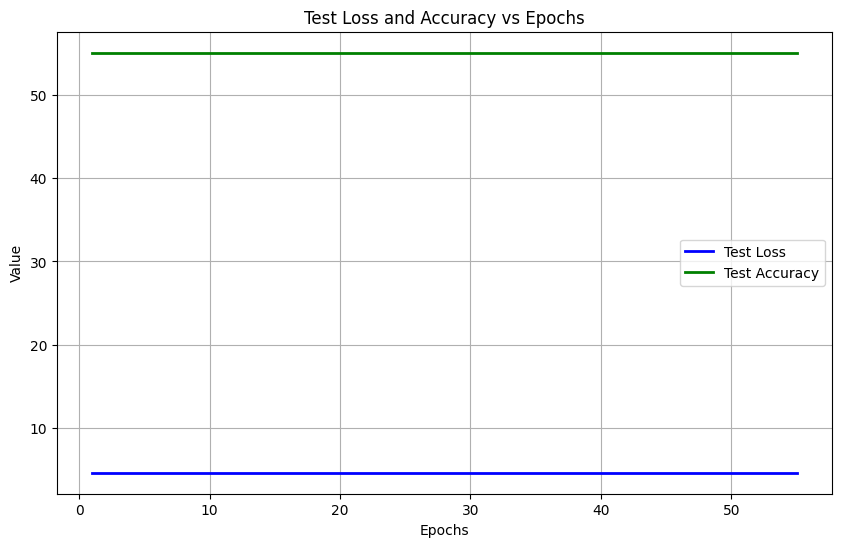

In [6]:

import torch
from sklearn.metrics import accuracy_score


from torchvision import datasets

test_set = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

def evaluate_model_on_test_data(model, test_loader, loss_fn, epochs):
    test_losses = []
    accuracies = []

    model.eval()
    with torch.no_grad():
        for epoch in range(epochs):
            correct = 0
            total = 0
            running_loss = 0.0

            for data in test_loader:
                inputs, labels = data
                outputs = model(inputs)
                loss = loss_fn(outputs, labels)
                running_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            avg_loss = running_loss / len(test_loader)
            accuracy = 100 * correct / total

            test_losses.append(avg_loss)
            accuracies.append(accuracy)

            print(f"Epoch [{epoch+1}/{epochs}], Test Loss: {avg_loss:.3f}, Test Accuracy: {accuracy:.2f}%")

    return test_losses, accuracies

epochs = 55
test_losses, accuracies = evaluate_model_on_test_data(model, test_loader, loss_fn, epochs)
plt.figure(figsize=(10, 6))

plt.plot(range(1, epochs+1), test_losses, color='b', label='Test Loss', linewidth=2)
plt.plot(range(1, epochs+1), accuracies, color='g', label='Test Accuracy', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Test Loss and Accuracy vs Epochs')
plt.legend()
plt.show()




Files already downloaded and verified


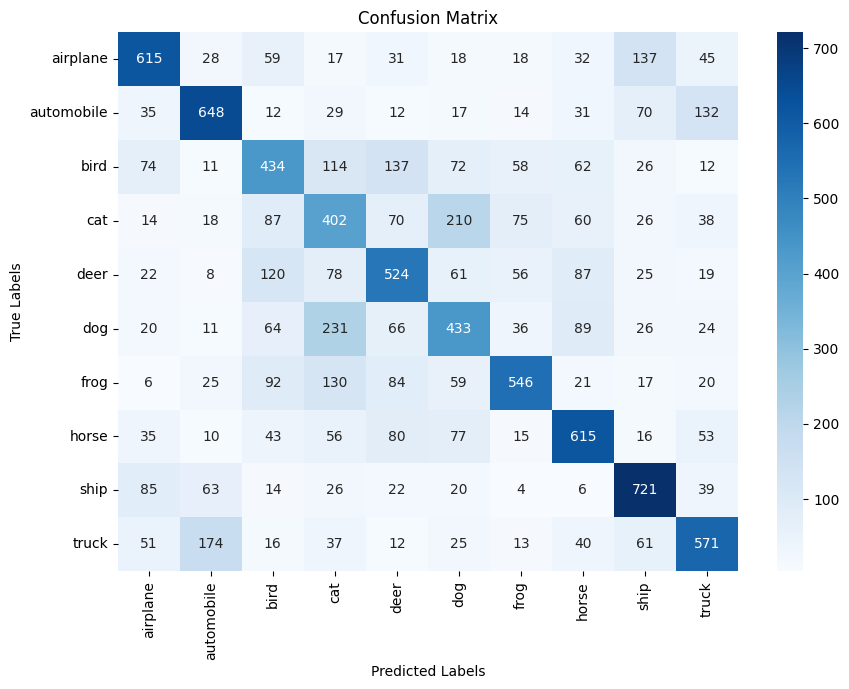

Classification Report:
               precision    recall  f1-score   support

    airplane       0.64      0.61      0.63      1000
  automobile       0.65      0.65      0.65      1000
        bird       0.46      0.43      0.45      1000
         cat       0.36      0.40      0.38      1000
        deer       0.50      0.52      0.51      1000
         dog       0.44      0.43      0.43      1000
        frog       0.65      0.55      0.60      1000
       horse       0.59      0.61      0.60      1000
        ship       0.64      0.72      0.68      1000
       truck       0.60      0.57      0.58      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000



In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


def plot_confusion_matrix_and_report(model, test_loader, test_dataset):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted().numpy())
            all_labels.extend(labels().numpy())
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=test_dataset.classes))


plot_confusion_matrix_and_report(model, test_loader, test_set)